## Hull-White Model
This notebook uses the model `finmc.models.hullwhite.HullWhiteMC` and shows how to
- create dataset for this model, with and without a term structure of rates
- use `finmc` calcs to plot asset evolution.

In [62]:
import numpy as np

from finmc.models.hullwhite import HullWhiteMC
from finmc.plots.asset import plot_asset

Create dataset for this model. See [Hull-Whote Model Documentation](https://finlib.github.io/finmc/models/hullwhite/) for explanation of model parameters. We will first create a dataset with a zero rate curve that is flat at 5%.


In [63]:
dataset = {
    "MC": {"PATHS": 100_000, "TIMESTEP": 1 / 250, "SEED": 1},
    "BASE": "USD",
    "ASSETS": {"USD": ("ZERO_RATES", np.array([[2.0, 0.05]]))},
    "HW": {
        "ASSET": "USD",
        "MEANREV": 0.1,
        "VOL": 0.03,
    },
}

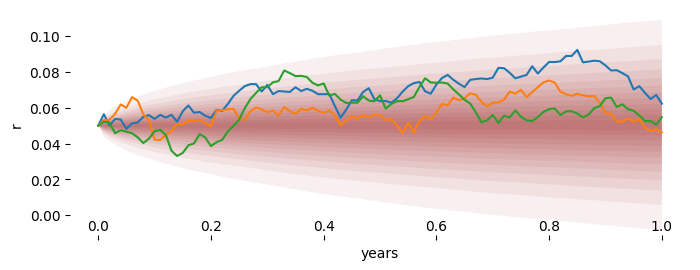

In [64]:
# create the model and plot the progression of short rate
model = HullWhiteMC(dataset)
plot_asset(model, "r")

Change the zero rate curve to have a term structure. Note the impact on the evolution of the short rates.

| Year | Rate |
|------|------|
| 0.2  | 5.0% |
| 0.5  | 4.5% |
| 1.0  | 4.0% |

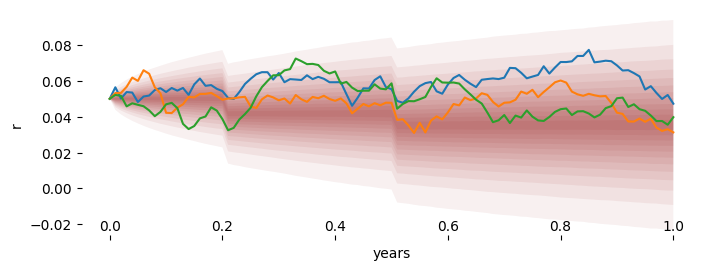

In [65]:
# Change the yield curve to be not flat, in place.
dataset["ASSETS"]["USD"] = (
    "ZERO_RATES",
    np.array([[0.2, 0.05], [0.5, 0.045], [1.0, 0.04]]),
)
plot_asset(model, "r")

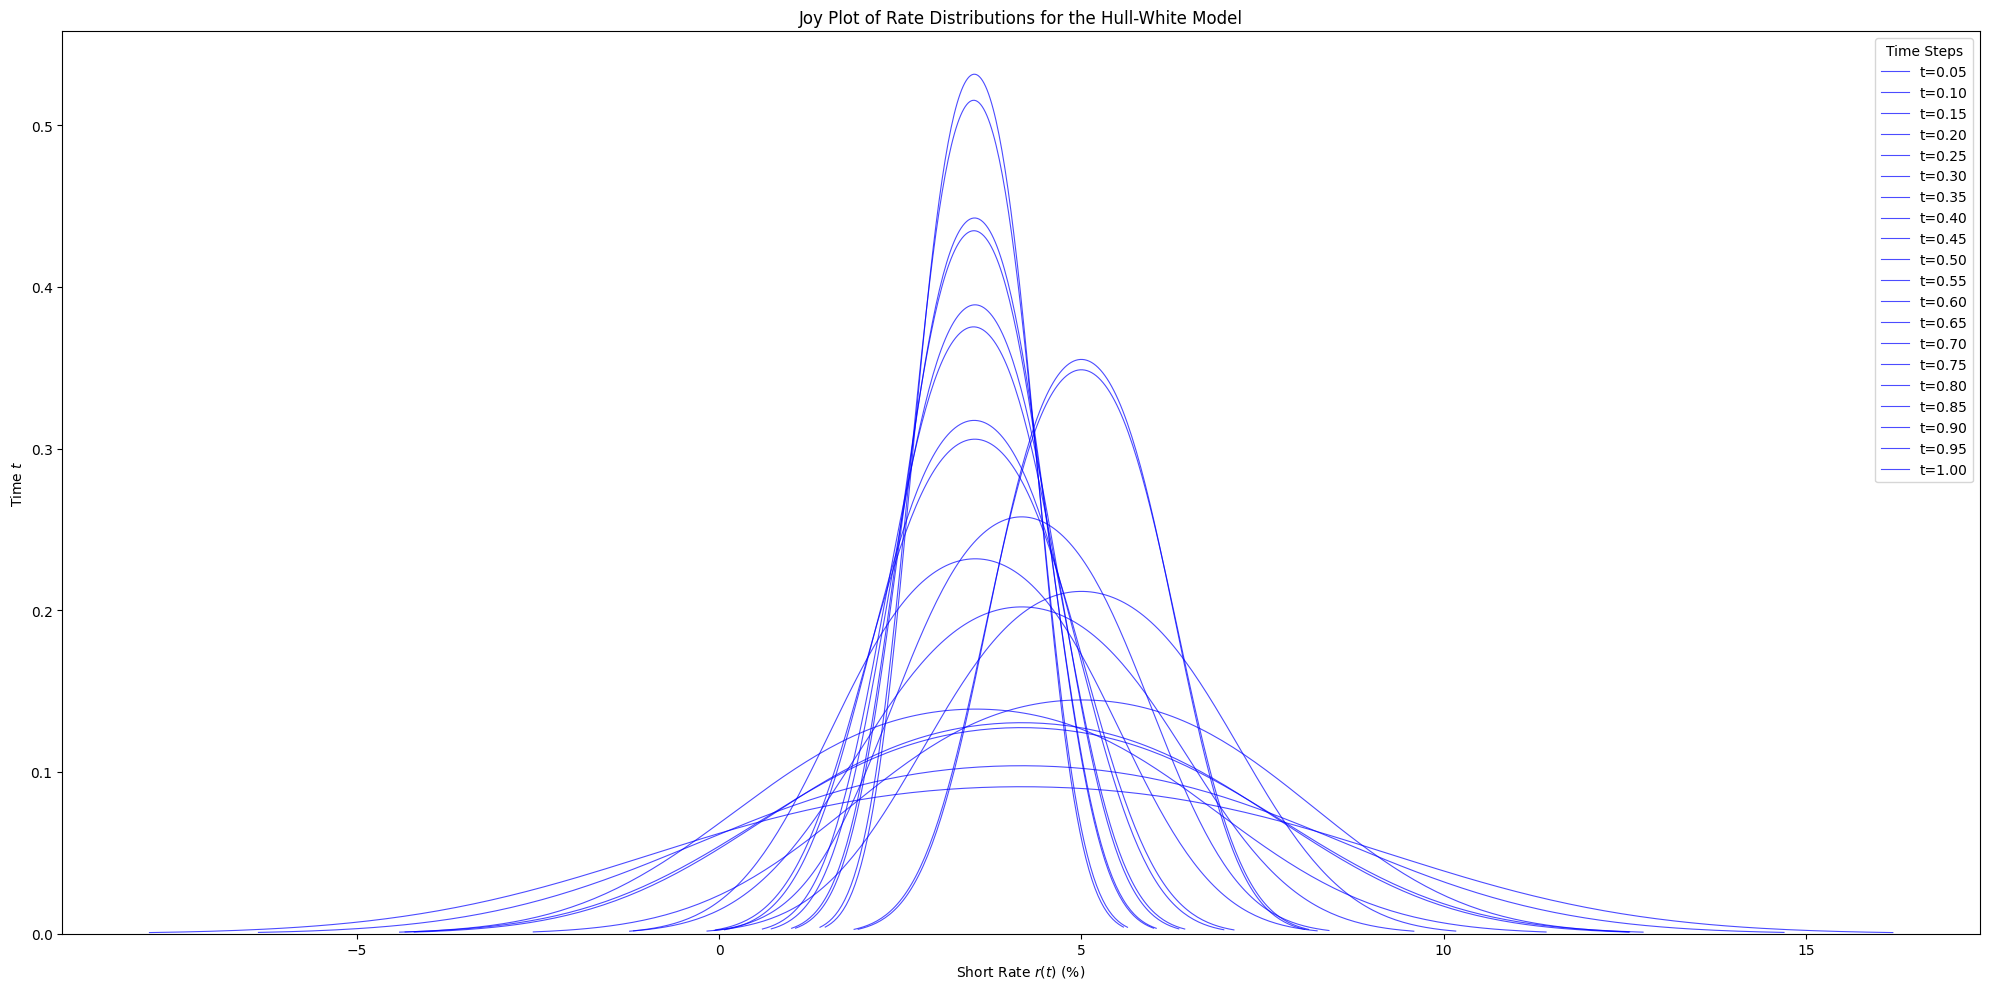

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from finmc.models.hullwhite import HullWhiteMC
import seaborn as sns

# Step 1: Define the dataset
dataset = {
    "MC": {"PATHS": 2, "TIMESTEP": 1 / 250, "SEED": 1},
    "BASE": "USD",
    "ASSETS": {"USD": ("ZERO_RATES", np.array([[2.0, 0.05]]))},
    "HW": {
        "ASSET": "USD",
        "MEANREV": 0.1,
        "VOL": 0.03,
    },
}

# Step 2: Initialize the model
model = HullWhiteMC(dataset)

# Change the yield curve to be non-flat
dataset["ASSETS"]["USD"] = (
    "ZERO_RATES",
    np.array([[0.2, 0.05], [0.5, 0.045], [1.0, 0.04]]),
)

# Step 3: Generate spots for multiple paths and convert to percentages
num_paths = 2  # Number of paths
times = np.linspace(0.05, 1.0, 20)  # Time steps for joy plot
spots = []

model.reset()
for t in times:
    model.advance(t)
    spot_rates = model.get_value("r") * 100  # Convert spot rates to percentages
    spots.append(spot_rates)

# Step 4: Plot the Basic Joy Plot
plt.figure(figsize=(20, 10))
plt.xlabel("Short Rate $r(t)$ (%)")
plt.ylabel("Time $t$")
plt.title("Joy Plot of Rate Distributions for the Hull-White Model")

# Plot each distribution as a line plot
for t, rates in zip(times, spots):
    sns.kdeplot(
        rates,
        color="blue",  # Use a single color for all time steps
        alpha=0.7,
        label=f"t={t:.2f}",
        linewidth=0.8,
    )

plt.legend(loc="upper right", title="Time Steps")
plt.tight_layout()
plt.show()


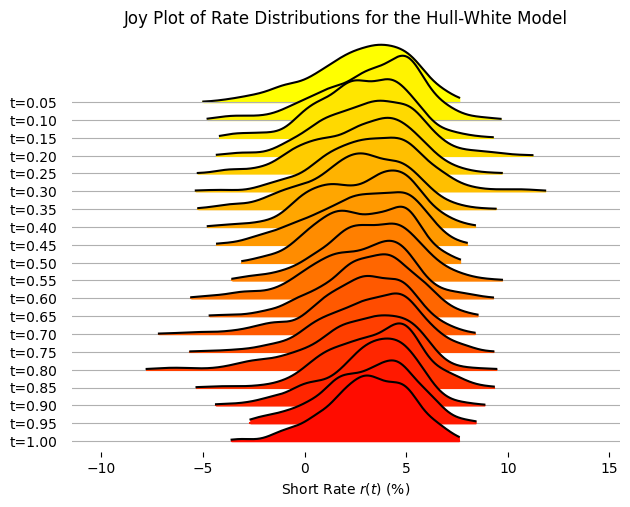

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import joypy
from finmc.models.hullwhite import HullWhiteMC

# Step 1: Define the dataset
dataset = {
    "MC": {"PATHS": 1000, "TIMESTEP": 1 / 250, "SEED": 1},
    "BASE": "USD",
    "ASSETS": {"USD": ("ZERO_RATES", np.array([[2.0, 0.05]]))},
    "HW": {
        "ASSET": "USD",
        "MEANREV": 0.1,
        "VOL": 0.03,
    },
}

# Step 2: Initialize the Hull-White model
model = HullWhiteMC(dataset)

# Change the yield curve to be non-flat
dataset["ASSETS"]["USD"] = (
    "ZERO_RATES",
    np.array([[0.2, 0.05], [0.5, 0.04], [1.0, 0.03]]),
)

# Step 3: Generate spot rates and sample paths
num_paths = 1000
times = np.linspace(0.05, 1.0, 20)  # Time steps
model.reset()

# Collect spot rates for all paths at different time steps
all_spots = []
for t in times:
    model.advance(t)
    spot_rates = model.get_value("r") * 100  # Convert to percentages
    all_spots.append(spot_rates)

# Convert collected data into a 2D NumPy array
all_spots = np.array(all_spots).T  # Shape: (num_paths, num_time_steps)
all_spots = all_spots.flatten()  # Flatten the sampled data into a 1D array

# Create a DataFrame for joypy
samples_df = pd.DataFrame({"values": all_spots})
samples_df["time"] = [ f"t={t:4.2f}" for t in times for _ in range(num_paths)]

# Step 5: Create the Joy Plot
fig, axes = joypy.joyplot(
    samples_df,
    by="time",
    column="values",
    colormap=cm.autumn_r,
    kind="kde",
    range_style="own",
    grid="y",
    tails=1e-2,
)

plt.xlabel("Short Rate $r(t)$ (%)")
plt.ylabel("Time Steps $t$")
plt.title("Joy Plot of Rate Distributions for the Hull-White Model")
plt.show()
